<a href="https://colab.research.google.com/github/sherlockieee/cs166/blob/main/session_12/CS166_PCW_Session_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
class IslingSimulation:
    def __init__(self, N, T):
        self.field = np.random.choice([-1, 1], size = (N, N))
        self.N = N
        self.T = T

    def __str__(self):
        return str(self.field)

    def step(self):
        i = np.random.choice(self.N)
        j = np.random.choice(self.N)

        cell = self.field[i][j]

        top = self.field[(i - 1) % self.N][j]
        bottom = self.field[(i + 1) % self.N][j]
        left = self.field[i][(j - 1) % self.N]
        right = self.field[i][(j + 1) % self.N]

        energy = -cell * (top + bottom + left + right)

        if np.random.random() < min(1, np.exp(2 * energy/self.T)):
            self.field[i][j] = -cell


    def run(self, steps):
        for i in range(steps):
            self.step()
        return self.field


def display_spin_field(field):
    img = Image.fromarray(np.uint8((field + 1) * 0.5 * 255))  # 0 ... 255
    return img.resize((200,200), Image.LANCZOS)
        

In [21]:

def plot_average_magnetization(repeats, steps, T, N):
    final_states = []

    for i in range(repeats):
        simulation = IslingSimulation(N, T)
        field = simulation.run(steps)
        avg_magnetized = np.count_nonzero(field == 1) / N**2
        final_states.append(avg_magnetized)
    
    plt.subplot(1, 2, 1)
    plt.imshow(display_spin_field(field))
    plt.subplot(1, 2, 2)
    plt.hist(final_states)
    plt.show()


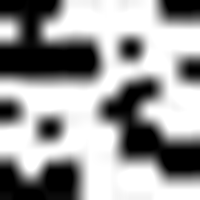

In [24]:
repeats = 100
steps = 100000
N = 10

simulation = IslingSimulation(N, T = 1)
display_spin_field(simulation.field)
new_field = simulation.run(steps = 100)
display_spin_field(new_field)


T = 1


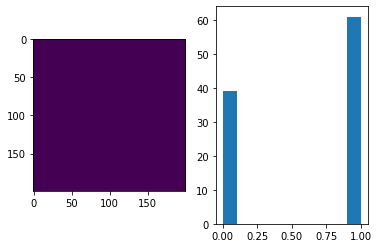

T = 2


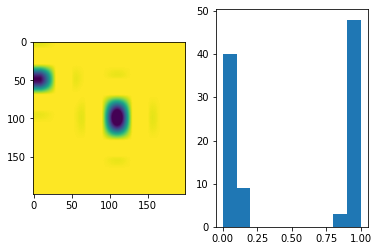

T = 3


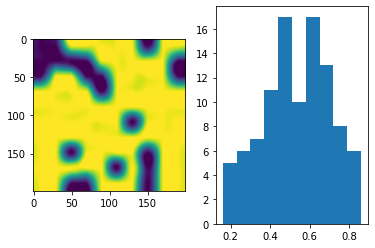

T = 4


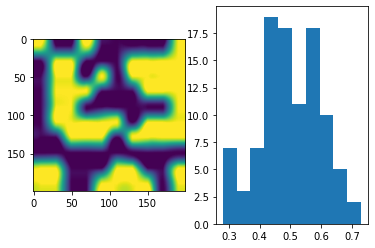

T = 5


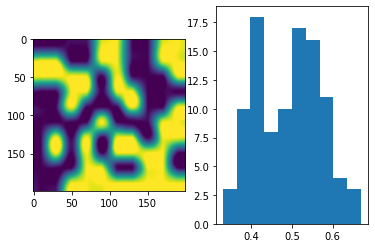

In [26]:

for T in range(1, 6):
    print(f"T = {T}")
    plot_average_magnetization(repeats, steps, T, N)